# DESAFIO ANÁLISE EXPLORATÓRIA

### Objetivo:

Fazer uma análise exploratória usando a base de dados Online Retail.

In [1070]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Preparando Dados

A base escolhida para Análise Exploratória foi a Online Reail.

In [425]:
# Carregando os dados 
df_vendas = pd.read_excel("Online Retail.xlsx")

In [693]:
df_vendas.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,TotalSales,date,year_month,OrderPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Não Cancelado,15.30,2010-12-01,2010-11-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Não Cancelado,22.00,2010-12-01,2010-11-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12


In [694]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540454 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo      540454 non-null object
StockCode      540454 non-null object
Description    540454 non-null object
Quantity       540454 non-null int64
InvoiceDate    540454 non-null datetime64[ns]
UnitPrice      540454 non-null float64
CustomerID     540454 non-null object
Country        540454 non-null object
Canceled       540454 non-null object
TotalSales     540454 non-null float64
date           540454 non-null datetime64[ns]
year_month     540454 non-null datetime64[ns]
OrderPeriod    540454 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(7)
memory usage: 57.7+ MB


In [554]:
# Como identificado anteriormente, precisamos remover valores NaN e espaços em branco
df_vendas['Description'] = df_vendas['Description'].str.strip()
df_vendas.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_vendas.dropna(axis=0, subset=['Description'], inplace=True)
df_vendas['CustomerID'] = df_vendas['CustomerID'].astype('str')

In [555]:
# Preparando os dados para a segmentação das compras canceladas
df_cancel = pd.DataFrame(columns=['Canceled'])
df_vendas['InvoiceNo'] = df_vendas['InvoiceNo'].astype('str')
df_cancel['Canceled'] = df_vendas['InvoiceNo']
df_vendas['Canceled'] = df_cancel['Canceled'][df_cancel['Canceled'].str.contains('C')]
df_vendas['Canceled'] = np.where(df_vendas['Canceled'].notnull(), 'Cancelado', df_vendas['Canceled'])
df_vendas['Canceled'] = df_vendas['Canceled'].fillna('Não Cancelado')

In [623]:
df_vendas['date'] = df_vendas['InvoiceDate'].dt.date
df_vendas['date'] = pd.to_datetime(df_vendas['date'], format="%Y-%m-%d")
df_vendas['year_month'] = df_vendas['date'] + pd.offsets.MonthBegin(-1)
df_vendas['OrderPeriod'] = df_vendas.date.apply(lambda x: x.strftime('%Y-%m'))

In [557]:
# Criando campo com total de vendas
df_vendas['TotalSales'] = df_vendas['Quantity'] * df_vendas['UnitPrice']

In [558]:
# Ajustando numbers para uma melhor visualização
pd.options.display.float_format = '{:,.2f}'.format

In [559]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540454 entries, 0 to 541908
Data columns (total 11 columns):
InvoiceNo      540454 non-null object
StockCode      540454 non-null object
Description    540454 non-null object
Quantity       540454 non-null int64
InvoiceDate    540454 non-null datetime64[ns]
UnitPrice      540454 non-null float64
CustomerID     540454 non-null object
Country        540454 non-null object
Canceled       540454 non-null object
TotalSales     540454 non-null float64
date           540454 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 49.5+ MB


## Análise Exploratória

In [611]:
# Exibindo os dados iniciais do dataset
df_vendas.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,TotalSales,date,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Não Cancelado,15.30,2010-12-01,2010-11-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Não Cancelado,22.00,2010-12-01,2010-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01


In [561]:
# Obtendo o percentual entre os status
df_prod = df_vendas.query('Description != "POSTAGE" and Description != "DOTCOM POSTAGE"')
df_prod.groupby(['Canceled'])['InvoiceNo'].count() / df_vendas['InvoiceNo'].count() * 100

Canceled
Cancelado        1.70
Não Cancelado   97.94
Name: InvoiceNo, dtype: float64

In [562]:
# Obtendo a receita por status
df_prod.groupby(['Canceled'])['TotalSales'].agg('sum').abs()

Canceled
Cancelado          884,937.96
Não Cancelado   10,360,209.77
Name: TotalSales, dtype: float64

In [563]:
# Calculando o percentual de cancelados por região
df_cancel = df_prod.groupby(['Country','Canceled'])['TotalSales'].sum().reset_index()
df_cancel = pd.pivot_table(df_cancel, values = 'TotalSales', index=['Country'], columns = 'Canceled').reset_index()
df_cancel['Cancelado'] = df_cancel['Cancelado'].fillna(0)
df_cancel['Não Cancelado'] = df_cancel['Não Cancelado'].fillna(0)
df_cancel['perc_cancel'] = df_cancel['Cancelado'].abs() / df_cancel['Não Cancelado'].abs() * 100
df_cancel.sort_values('perc_cancel', inplace=True, ascending=False)
df_cancel.head(5)

Canceled,Country,Cancelado,Não Cancelado,perc_cancel
30,Singapore,"-12,158.90","21,279.29",57.14
34,USA,"-1,849.47","3,580.39",51.66
16,Hong Kong,"-5,574.76","15,516.80",35.93
2,Bahrain,-205.74,754.14,27.28
8,Czech Republic,-115.02,786.74,14.62


#### Cancelamentos

Iniciamos a análise olhando os dados de Cancelados. Podemos ver que apenas 1,7% das vendas foram canceladas, porém essas vendas representam o valor de 885 mil. Podemos tomar ações para diminuir os cancelamentos.

No quadro acima também vemos que alguns países possuem um indice de cancelamento acima de 50%, tornando a necessidade de ação mais rápida e intensa.

In [624]:
# Para todos as análises seguintes vamos usar o dataset somente com vendas aprovadas e de produtos
df_prod_aprov = df_vendas.query('Description != "POSTAGE" and Description != "DOTCOM POSTAGE" and Canceled == "Não Cancelado"')

In [625]:
# Também identificamos na base alguns itens que foram descartados. Esses itens serão desconsiderados da análise
df_prod_aprov = df_prod_aprov.query('Quantity > 0')

In [1066]:
df_prod_aprov.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled,TotalSales,date,year_month,OrderPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Não Cancelado,15.30,2010-12-01,2010-11-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Não Cancelado,22.00,2010-12-01,2010-11-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Não Cancelado,20.34,2010-12-01,2010-11-01,2010-12


### Análise Geral Pedidos Aprovados

In [695]:
# Total de Pedidos
qtd_pedidos = df_prod_aprov['InvoiceNo'].nunique()
print('Quantidade de pedidos: {}'.format(qtd_pedidos))

Quantidade de pedidos: 20060


In [696]:
# Total de vendas Receita
receita_t = df_prod_aprov['TotalSales'].sum()
print('Receita Total: {0:0.2f}'.format(receita_t))

Receita Total: 10360209.77


In [697]:
# Total de Itens Vendidos
itens_t = df_prod_aprov['Quantity'].sum()
print('Total de Itens: {}'.format(itens_t))

Total de Itens: 5624576


In [698]:
# Ticket Médio
tm = df_prod_aprov['TotalSales'].sum()/df_prod_aprov['InvoiceNo'].nunique()
print('Ticket Médio: {0:0.2f}'.format(tm))

Ticket Médio: 516.46


In [699]:
# Itens por pedido
itens_pedido = df_prod_aprov['Quantity'].sum()/df_prod_aprov['InvoiceNo'].nunique()
print('Itens Por Pedido: {0:0.2f}'.format(itens_pedido))

Itens Por Pedido: 280.39


In [702]:
# Quantidade de clientes
qtd_clientes = df_prod_aprov['CustomerID'].nunique()
print('Quantidade de clientes únicos: {}'.format(qtd_clientes))

Quantidade de clientes únicos: 4340


In [703]:
# Quantidade de pedidos por clientes
pedidos_clientes = df_prod_aprov['InvoiceNo'].nunique()/df_prod_aprov['CustomerID'].nunique()
print('Pedidos por clientes: {0:0.2f}'.format(pedidos_clientes))

Pedidos por clientes: 4.62


In [574]:
# Top 5 dos produtos mais vendidos por quantidade
df_prod_top_5 = df_prod_aprov.groupby(['Description'])['Quantity'].sum().reset_index()
df_prod_top_5.sort_values('Quantity', ascending=False, inplace=True)
df_prod_top_5['perc_total'] = df_prod_top_5['Quantity'] / df_prod_top_5['Quantity'].sum() * 100
df_prod_top_5.head(5)

,Description,Quantity,perc_total
2391,"PAPER CRAFT , LITTLE BIRDIE",80995,1.44
2053,MEDIUM CERAMIC TOP STORAGE JAR,78033,1.39
3937,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,0.98
1815,JUMBO BAG RED RETROSPOT,48478,0.86
3847,WHITE HANGING HEART T-LIGHT HOLDER,37895,0.67


Na análise geral podemos analisar alguns indicadores importantes quando estramos trabalhando com vendas. Com essasa informações conseguimos identificar o perfil geral da empresa de varejo e como as vendas se comportam. Com esses dados poderemos comparar períodos e segmentações como Country.

### Análise Por Região

In [575]:
# Obtendo os dados de vendas agrupado por Country
df_prod_aprov_g = df_prod_aprov.groupby(['Country']).agg({'InvoiceNo':'nunique','TotalSales':'sum'
                                                          ,'Quantity':'sum','CustomerID':'nunique'}).reset_index()
df_prod_aprov_g.sort_values('TotalSales', inplace=True, ascending=False)

In [576]:
df_prod_aprov_g['PercVendas'] = df_prod_aprov_g['TotalSales'] / df_prod_aprov['TotalSales'].sum() * 100
df_prod_aprov_g.rename(columns={'InvoiceNo':'Order','CustomerID':'Customer'}, inplace=True)
df_prod_aprov_g.head(5)

,Country,Order,TotalSales,Quantity,Customer,PercVendas
36,United Kingdom,18154,"8,787,942.25",4700498,3922,84.82
24,Netherlands,94,"283,889.34",200834,9,2.74
10,EIRE,288,"283,453.96",147447,4,2.74
14,Germany,449,"207,866.14",118149,94,2.01
13,France,387,"194,261.11",111279,88,1.88


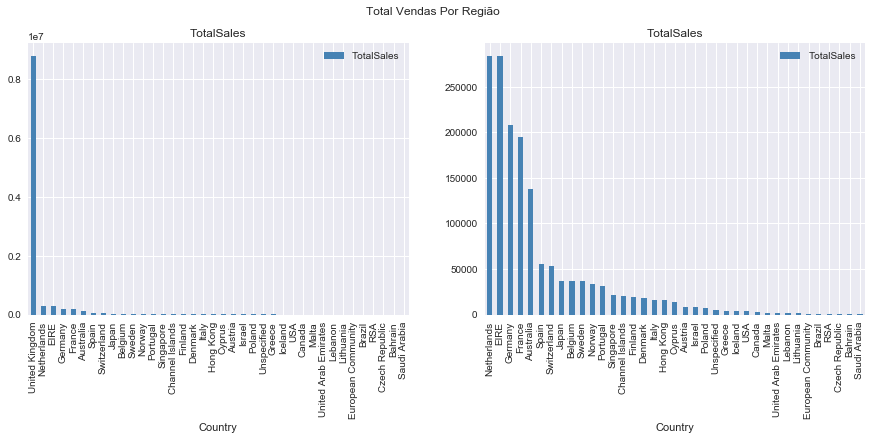

In [577]:
# Ajustando axes para plot de dois gráficos
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# Plot dos gráficos
df_prod_aprov_g.plot(kind='bar', x='Country', y='TotalSales', ax = axes[0], color='steelblue'
      , title='Total Vendas Por Região', subplots=True)
df_prod_aprov_g.iloc[1:].plot(kind='bar', x='Country', y='TotalSales', ax = axes[1], color='steelblue'
      , title='Total Vendas Por Região', subplots=True)
plt.show()

Acima podemos ver que United Kingdom representa 84% do total de vendas aprovadas. Plotamos dois gráficos, sendo que o segundo não inclui os dados das vendas do United Kingdom para observarmos os demais países.

In [964]:
# Criando a coluna com os indicadores
def kpis_calc(df):
    """
    Calcula os KPIs principais definidos nessa análise
    Args: DataFrame que deseja fazer os calculos
    Returns: DataFrame com os novos calculos
    """
    df['AvgTicket'] = df['TotalSales']/df['Order']
    df['BasketSize'] = df['Quantity']/df['Order']
    df['OrderCustomer'] = df['Order']/df['Customer']
    df['SalesCustomer'] = df['TotalSales']/df['Customer']
    
    return df
df_prod_aprov_g = kpis_calc(df_prod_aprov_g)

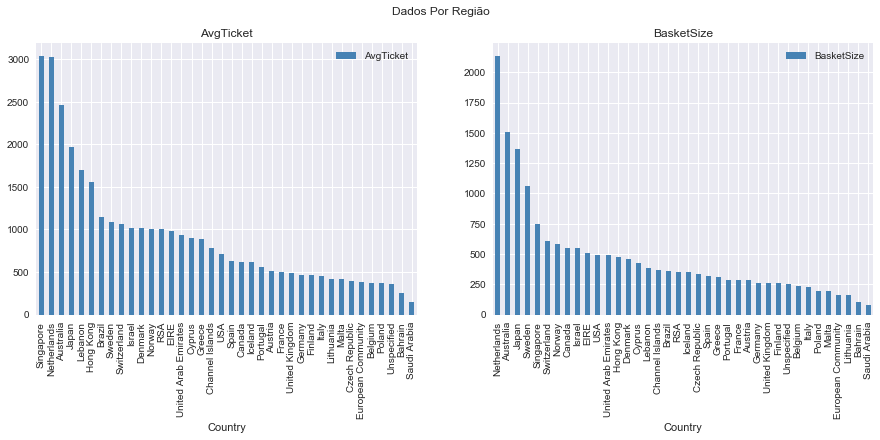

In [1064]:
# Ajustando axes para plot de dois gráficos
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# Plot dos gráficos
df_prod_aprov_g.sort_values('AvgTicket', ascending=False).plot(kind='bar', x='Country', y='AvgTicket', ax = ax1, color='steelblue', title='Dados Por Região', subplots=True)
df_prod_aprov_g.sort_values('BasketSize', ascending=False).plot(kind='bar', x='Country', y='BasketSize', ax = ax2, color='steelblue', title='Dados Por Região', subplots=True)
plt.show()

Nos gráficos acima podemos ver o comportamento do Ticket Médio e Itens Por Carrinho de cada país. Podemos ver que se tratando de TM os países Singapore e Netherlands ficam nos primeiros lugares. Podemos trabalhar o aumento das vendas nessas regiões ou até mesmo entender os motivos que fazem o TM ser tão alto para replicar as demais regiões. Por exemplo, se conseguirmos aumentar o TM da região United Kingdom, teremos uma melhora na performance das vendas no geral considerando o fato dessa região representar mais de 80% do total.

O mesmo se aplica a quantidade de itens por carrinho. Nesse quesito os dois primeiros são Netherlands e Australia. Esse indicador pode ter uma forte relação com TM, porém precisa ser analisado, pois mesmo aumentando a quantidade de itens, podemos não ter aumento no total se os itens são de valor baixo. É muito importante o equilibrio entre quantidade e valor dos itens. A melhor estratégia é conseguir equilibrar a cesta. Para isso podemos trabalhar com modelos de associação para identificar oportunidades.

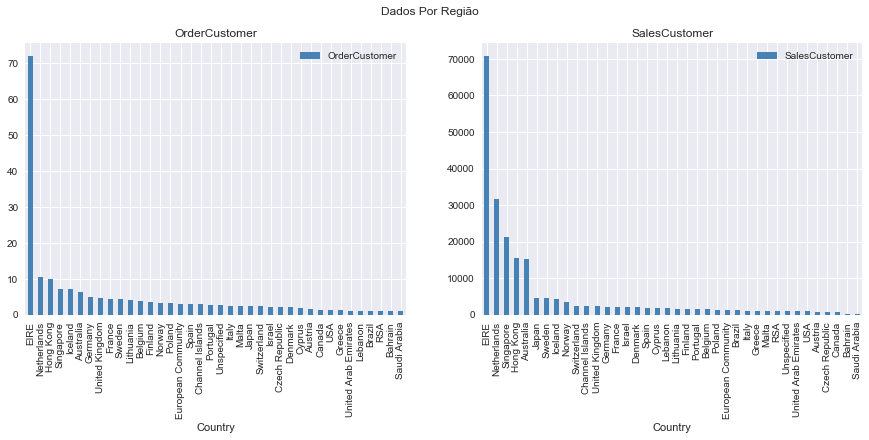

In [580]:
# Ajustando axes para plot de dois gráficos
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# Plot dos gráficos
df_prod_aprov_g.sort_values('OrderCustomer', ascending=False).plot(kind='bar', x='Country', y='OrderCustomer', ax = ax1, color='steelblue', title='Dados Por Região', subplots=True)
df_prod_aprov_g.sort_values('SalesCustomer', ascending=False).plot(kind='bar', x='Country', y='SalesCustomer', ax = ax2, color='steelblue', title='Dados Por Região', subplots=True)
plt.show()

Os gráficos acima nos mostram a quantidade de pedidos e receita por cliente. Podemos identificar que se comportam de forma diferente entre os países, porém um ponto que chama a atenção se tratando de pedidos é o país EIRE que tem uma diferença considerável em relação aos demais. 

Esse indicador indica, em um modo geral, os países que conseguem uma taxa de recompra maior. Pensando um sustentabilidade do negócio, quanto maior a taxa de recompra, melhor. Isso indica que teremos menos gastos com aquisição de novos clientes (dependendo da estratégia tomada).

In [581]:
df_prod_top_5 = df_prod_aprov.groupby(['Country','Description'])['Quantity'].sum().reset_index()
df_prod_top_5 = df_prod_top_5.pivot(index='Country', columns='Description', values='Quantity')
df_prod_top_5.reset_index(inplace=True)
# 
df_prod_top_5 = df_prod_top_5.set_index('Country').apply(lambda x: pd.Series(x.sort_values(ascending=False)
       .iloc[:5].index, 
      index=['top1','top2','top3','top4', 'top5']), axis=1).reset_index()
df_prod_top_5.head(5)

,Country,top1,top2,top3,top4,top5
0,Australia,MINI PAINT SET VINTAGE,RABBIT NIGHT LIGHT,RED HARMONICA IN BOX,RED TOADSTOOL LED NIGHT LIGHT,HOMEMADE JAM SCENTED CANDLES
1,Austria,SET 12 KIDS COLOUR CHALK STICKS,MINI JIGSAW PURDEY,PACK OF 6 PANNETONE GIFT BOXES,PACK OF 6 SWEETIE GIFT BOXES,ANGEL DECORATION 3 BUTTONS
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS,OCEAN SCENT CANDLE IN JEWELLED BOX,DOUGHNUT LIP GLOSS,GROW A FLYTRAP OR SUNFLOWER IN TIN,S/4 PINK FLOWER CANDLES IN BOWL
3,Belgium,PACK OF 72 RETROSPOT CAKE CASES,ROUND SNACK BOXES SET OF4 WOODLAND,PACK OF 60 SPACEBOY CAKE CASES,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
4,Brazil,DOLLY GIRL LUNCH BOX,ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,SMALL HEART FLOWERS HOOK


Na tabela acima podemos comparar os produtos mais vendidos por região. Como temos visto até o momento, cada país tem um comportamento diferente, por esse motivo vale muito uma análise mais detalhada de cada país.

### Análise Geral Germany

Como identificamos que os países possuem comportamentos e públicos diferentes, daqui pra frente todas as análises serão feitas com base em um país específico. O que podemos fazer é automatizar a análise para obter os dados em um Dashboard com filtro "Country".

O país escolhido foi "Germany".

In [626]:
df_prod_ct = df_prod_aprov.query('Country == "Germany"')
df_prod_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8668 entries, 1109 to 541805
Data columns (total 13 columns):
InvoiceNo      8668 non-null object
StockCode      8668 non-null object
Description    8668 non-null object
Quantity       8668 non-null int64
InvoiceDate    8668 non-null datetime64[ns]
UnitPrice      8668 non-null float64
CustomerID     8668 non-null object
Country        8668 non-null object
Canceled       8668 non-null object
TotalSales     8668 non-null float64
date           8668 non-null datetime64[ns]
year_month     8668 non-null datetime64[ns]
OrderPeriod    8668 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(7)
memory usage: 948.1+ KB


In [719]:
print('Pedidos Germany: {0} - Pedidos Total: {1} - Participação: {2:0.2f}%'.format(df_prod_ct['InvoiceNo'].nunique(), qtd_pedidos, df_prod_ct['InvoiceNo'].nunique()/qtd_pedidos*100))
print('Receita Germany: {0:0.2f} - Receita Total: {1:0.2f} - Participação: {2:0.2f}%'.format(df_prod_ct['TotalSales'].sum(), receita_t,df_prod_ct['TotalSales'].sum()/receita_t*100)) 
print('Itens Germany: {0} - Itens Total: {1} - Participação: {2:0.2f}%'.format(df_prod_ct['Quantity'].sum(), itens_t, df_prod_ct['Quantity'].sum()/itens_t*100))
print('Clientes Germany: {0} - Clientes Total: {1} - Participação: {2:0.2f}%'.format(df_prod_ct['CustomerID'].nunique(),qtd_clientes,df_prod_ct['CustomerID'].nunique()/qtd_clientes*100))
print('Ticket Médio Germany: {0:0.2f} - TM Total: {1:0.2f}'.format(df_prod_ct['TotalSales'].sum()/df_prod_ct['InvoiceNo'].nunique(),tm))
print('Itens Por Pedido Germany: {0:0.2f} - I/P Total: {1:0.2f}'.format(df_prod_ct['Quantity'].sum()/df_prod_ct['InvoiceNo'].nunique(),itens_pedido))
print('Pedidos Por Clientes Germany: {0:0.2f} - P/C Total: {1:0.2f}'.format(df_prod_ct['InvoiceNo'].nunique()/df_prod_ct['CustomerID'].nunique(),pedidos_clientes))

Pedidos Germany: 449 - Pedidos Total: 20060 - Participação: 2.24%
Receita Germany: 207866.14 - Receita Total: 10360209.77 - Participação: 2.01%
Itens Germany: 118149 - Itens Total: 5624576 - Participação: 2.10%
Clientes Germany: 94 - Clientes Total: 4340 - Participação: 2.17%
Ticket Médio Germany: 462.95 - TM Total: 516.46
Itens Por Pedido Germany: 263.14 - I/P Total: 280.39
Pedidos Por Clientes Germany: 4.78 - P/C Total: 4.62


Acima temos a comparação da Germany entre Geral, dos indicadores principais. Podemos identificar que com exceção dos Pedidos Por Clientes, a Alemanhã está abaixo em relação ao geral.

In [1095]:
# Preparando dados de quantidade de itens
df_qtd_itens = df_prod_ct.groupby(['InvoiceNo','CustomerID'])['InvoiceDate'].count().reset_index()
df_qtd_itens = df_qtd_itens.rename(columns = {'InvoiceDate':'qtd_itens'})

# Preparando dados de receita
df_receita = df_prod_ct.groupby(['InvoiceNo','CustomerID'])['TotalSales'].sum().reset_index()

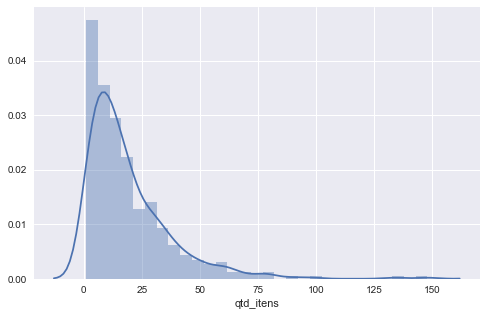

In [1096]:
# Plot do gráfico de distribuição
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.distplot(df_qtd_itens['qtd_itens'],ax=ax)
plt.show()

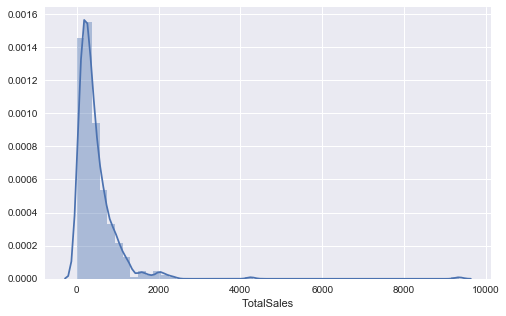

In [1098]:
# Plot do gráfico de distribuição
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.distplot(df_receita['TotalSales'],ax=ax)
plt.show()

Podemos identificar nos gráficos acima que a maioria das pessoas compram menos de 25 itens e gastam menos de mil euros por pedido.

### Tempo

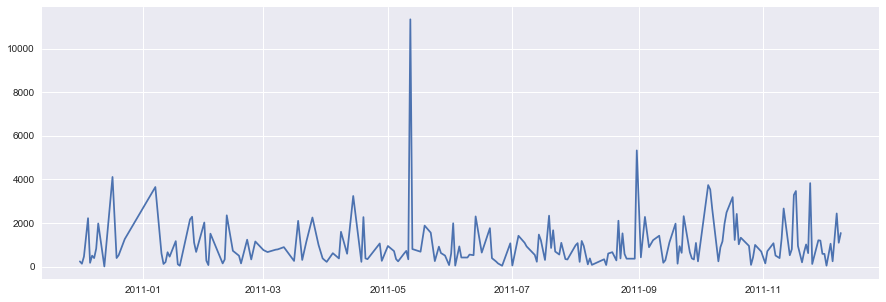

In [619]:
df_prod_dt = df_prod_ct.groupby(['date'])['TotalSales'].sum().reset_index()
df_prod_dt.sort_values('date', inplace=True, ascending=True)
df_prod_dt.set_index('date', inplace=True)
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_prod_dt)

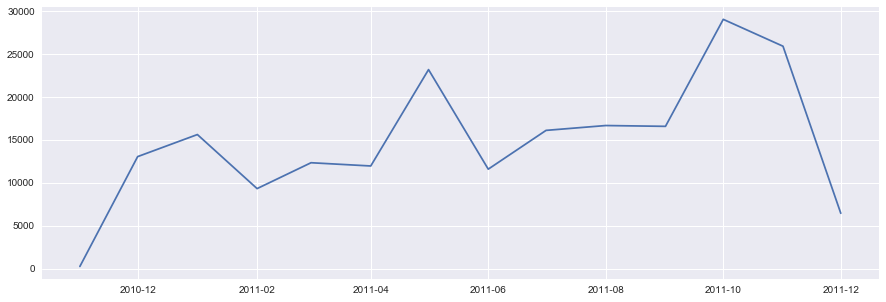

In [1063]:
df_prod_dt = df_prod_ct.groupby(['year_month'])['TotalSales'].sum().reset_index()
df_prod_dt.sort_values('year_month', inplace=True, ascending=True)
df_prod_dt.set_index('year_month', inplace=True)
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_prod_dt)

Nos gráficos acima podemos identificar os perídodos com maior quantidade de vendas. No gráfico por dia vemos um pico de vendas que precisa ser analisado. Esse pico puxou o total de vendas para cima no consolidado mês, poém não conseguiu atingir o pico no mês 10 e 11. Precisamos analisar esses meses para identificar os motivos. Se for uma ação que não seja pontual como Black Friday, precisamos entender os motivos para se possível aprender e levar soluções parecidas para os próximos meses. Vale também analisar os produtos mais vendidos para cada mês.

In [1017]:
df_prod_tp = df_prod_ct.groupby(['year_month']).agg({'InvoiceNo':'nunique','TotalSales':'sum'
                                                          ,'Quantity':'sum','CustomerID':'nunique'}).reset_index()
df_prod_tp.rename(columns={'InvoiceNo':'Order','CustomerID':'Customer'}, inplace=True)

In [1018]:
# Calculando os novos KPIs
df_prod_tp = kpis_calc(df_prod_tp)
df_prod_tp.reset_index(inplace=True)

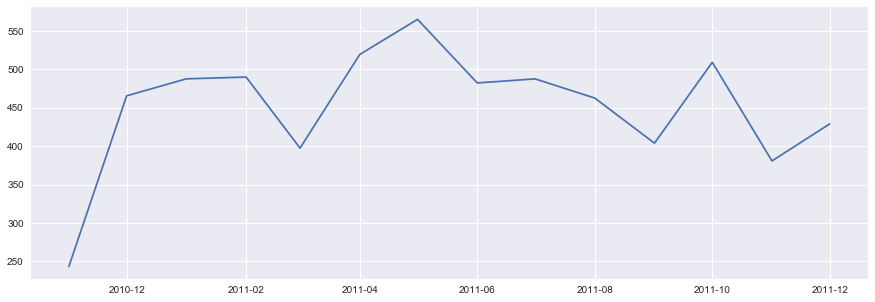

In [1019]:
# Analisando TM
df_prod_tm = df_prod_tp[['year_month','AvgTicket']].copy()
df_prod_tm.set_index('year_month', inplace=True)
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_prod_tm);

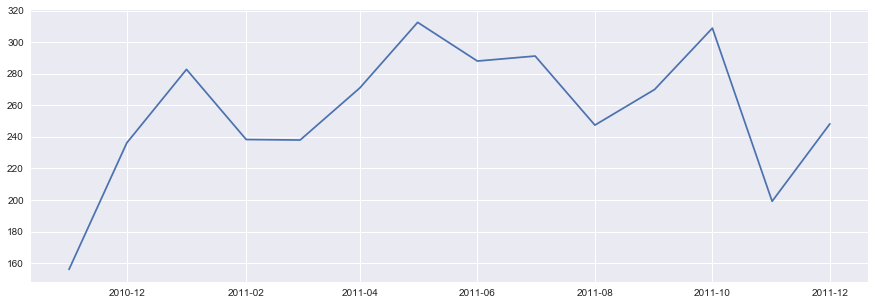

In [1020]:
# Analisando Basket Size
df_prod_bs = df_prod_tp[['year_month','BasketSize']].copy()
df_prod_bs.set_index('year_month', inplace=True)
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_prod_bs);

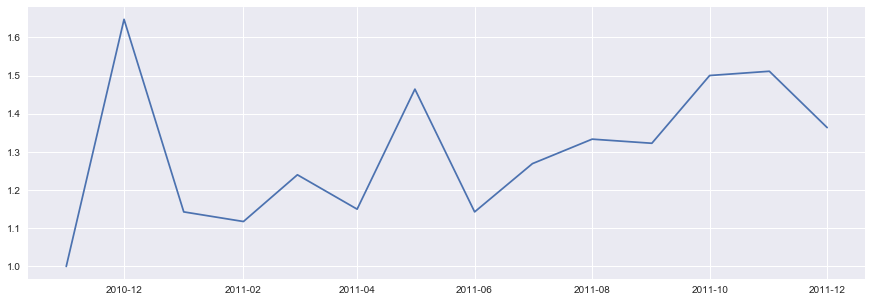

In [1021]:
# Analisando Order / Customer
df_prod_oc = df_prod_tp[['year_month','OrderCustomer']].copy()
df_prod_oc.set_index('year_month', inplace=True)
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_prod_oc);

No gráfico acima conseguimos visualizar a evolução de cada KPI.

#### Cohort

In [1047]:
# Preparando os dados base
df_cohort = df_prod_aprov.query('Country == "Germany"').copy()
df_cohort = df_cohort.groupby(['date','CustomerID','InvoiceNo','OrderPeriod'])['Country'].count().reset_index()

In [1048]:
# Filtro das vendas somente de 2011
df_cohort = df_cohort.query('date >= "2011-01-01"').copy()

In [1052]:
df_cohort.set_index('CustomerID', inplace=True)

df_cohort['CohortGroup'] = df_cohort.groupby(level=0)['date'].min().apply(lambda x: x.strftime('%Y-%m'))
df_cohort.reset_index(inplace=True)

In [1053]:
cohorts = df_cohort.groupby(['CohortGroup', 'OrderPeriod']).agg({'CustomerID': 'nunique',
                       'InvoiceNo': 'nunique',
                       'Country': 'sum'})

# make the column names more meaningful
cohorts.rename(columns={'CustomerID': 'TotalUsers',
                        'InvoiceNo': 'TotalOrders',
                        'Country': 'Qty'}, inplace=True)

In [1054]:
def cohort_period(df):
    """
    Criar uma coluna com o periodo na primeira compra.
    Args: Data Frame que deseja fazer o calculo
    return: Data Frame com a nova coluna
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [1055]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# Criar uma série com o tamanho de cada CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()

In [1056]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

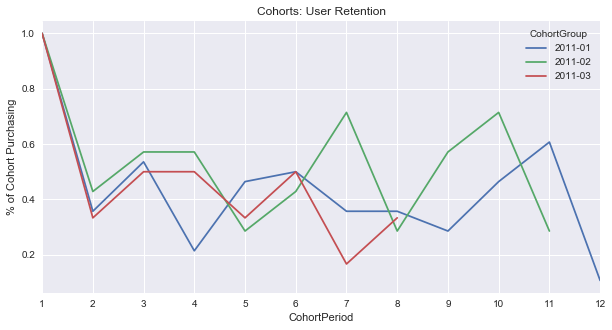

In [1057]:
# Plot dos dados dos 3 meses iniciais
user_retention[['2011-01', '2011-02', '2011-03']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

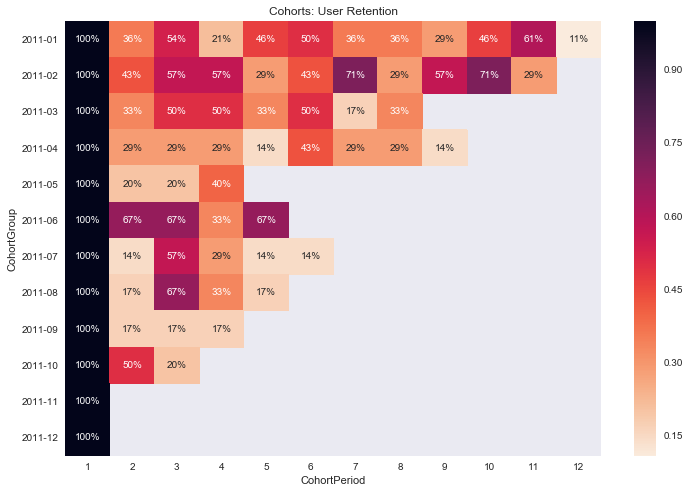

In [1058]:
# Plot do mapa de calor
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap=sns.cm.rocket_r);

A análise Cohort é uma importante aliada e nos mostra como é o comportamento de compra dos clientes ao longo do tempo. O mapa de calor acima nos mostra uma variação ao longo do tempo, porém precisamos fazer mais alguns ajustes na base para validação e posteriormente afirmações e ações.

# Conclusão

A análise exploratória é uma ferramenta de extrema importância para enconstramos informações relevantes para tomar decisões e gerar insights. Mesmo com uma base pequena e com poucos dados podemos extrair muita informação e trazer análises importantes. 

Essa exploração trouxe informações relevantes e que podem direcionar tomadores de decisão, porém esses dados ainda podem ser trabalhados de forma mais aprofundada.
